# Chapter 2: From Observation to Intervention 

The ultimate aim of many statistical studies is to predict the effects of interventions. 
For example, when we collect data on factors associated with wildfires, we look for something we can intervene in to decrease wildfire frequency. 
When we perform a study on a new cancer drug, we try to identify how a patient’s illness responds when we intervene upon it by medicating the patient.  

For this reason, the **randomized controlled experiment** is considered the golden standard of statistics. All factors influencing the outcome variable are static or random in a randomized controlled experiment, except for one. So any change in the outcome variable must be due to that one input variable. Unfortunately, <font color='red'>randomized controlled experiments are not possible in many real-world problems</font>. 
For example, we cannot control the weather, so we can’t randomize the variables that affect wildfires. Even randomized drug trials can run into problems when participants drop out, fail to take their medication, or misreport their usage. 

<font color='red'>In cases where randomized controlled experiments are not practical, researchers instead perform **observational studies**</font>, in which they record data rather than control it. The problem with such studies is that it is difficult to untangle the causal from the correlative. Consider spurious correlation example of the correlation between an increase in ice cream sales with an increase in violent crime. Our common sense tells us that intervening in ice cream sales is unlikely to affect crime, but the facts are not always so clear. 

<br/><br/>
So, what is the difference between **intervening on a variable** and **conditioning on that variable** [(ref)](http://bayes.cs.ucla.edu/PRIMER/ch3-preview.pdf)?

* When we **intervene on a variable** in a model, we fix its value. We change the system, and the values of other variables often change as a result.

* When we **condition on a variable**, we change nothing; we just narrow our focus to the subset of cases in which the variable takes the value we are interested in. In other words, our perception of the world will change, not the world itself.


<br/><br/>
## Different Conditional Queries (Distributions)  

We have i.i.d. data sampled from some joint distribution $p(x,y,z,…)$. Let's assume we have lots of data and the best tools (say, deep networks) to fully estimate this joint distribution or any property, conditional or marginal distribution. In other words, we assume $p$ is known and tractable. Our goal is to know how variable $y$ behaves given $x$. 

At a high level, one can ask this question in three ways:

* **Observational** query $p(y|x)$
* **Interventional** query $p(y|do(x))$
* **Counterfactual** query $p(y|do(X=x'))$

<br/><br/>
#### Observational Queries

* Observational query $p(y|x)$ is the distribution of $Y$ given that we observe variable $X$ takes value $x$.

* It is a conditional distribution which can be calculated from $p(x,y,z,…)$ as a ratio of two of its marginals  $p(y|x)=p(x,y)/p(x)$ . We're all very familiar with this object and know how to estimate this from data.

* This is what we usually estimate in supervised machine learning.

In other words, we have observed $X=x$. Then we ask what is the probability of $Y$?

<br/><br/>
#### Interventional Queries

* Interventional $p(y|do(x))$ is the distribution of $Y$ if we were to set the value of $X$ to $x$.

* This describes the distribution of  $Y$  that we would observe if we intervened in the data generating process by artificially forcing the variable $X$ to take value  $x$.

* $p(y|do(x))$ is the conditional distribution we would learn from data collected in randomized controlled trials or A/B tests where the experimenter controls $x$.

* Note that carrying out the intervention or randomized trials may be impossible or at least impractical or unethical in many situations.

In other words, we set (manipulate) the value $X=x$. Then, we ask what is the probability of $Y$?

<br/><br/>
#### Counterfactuall Queries

* Interventional  $p(y|do(X=x'))$ is the distribution of $Y$ if we were to set the value of $X$ to $x'$ with new distribution generated by a mutilated causal model. 

* A causal graph encodes which variables have a direct causal effect on any given node - we call these causal parents of the node. 

* By mutilating a causal graph, we are making a different world with a different story. We make a twin for our story with some changes. Then, we make a prediction about features of the unobserved twin dataset based on features of the observed dataset.

In other words, we have observed $X=x$ and $Y=y$. Then, we ask what would have been the probability of observing $Y=y'$ if we had observed $X=x'$ instead of $X=x$ ?


![img](img/ch2/Exp_Intervention.png)   


<br/><br/>

### Causal Models bridge observational query $p(y|do(x))$ and interventional query $p(y|x))$


***If we can not measure $p(y|do(x))$ directly in a randomized controlled trial, can we estimate it based on data we observed outside of a controlled experiment?***


* We are interested in predicting $y$ from $x$ and say that $z$ is a third variable which we do not want to infer but we can also measure. 

* The observational conditional  $p(y|x)$ is calculated from the observable joint dist via a simple conditioning. 

* We're interested in $p(y|do(x))$ (red color) rather than $p(y|x)$ (blue color).

* We can only predict how our distribution changes due to intervention by knowing how the variables are causally related. <font color='red'>We need domain expertise to make a causal model.</font>

* Once we have a causal diagram, <font color='red'>we can emulate the effect of intervention by mutilating the causal network</font>. We delete all edges that lead into nodes in a do operator (the middle-top panel). 

* The mutilated causal model then gives rise to a joint distribution denoted by the red factor graph. This joint has a corresponding conditional distribution $p(y|do(x))$. 

![img](img/ch2/Obser2Interven.png)  
<br/><br/>





<br/><br/>
## Using Tablets in School, an Example for Causal Modeling

Some people think that schools that give tablets to their students perform better than those that don't. You can quickly point out that it is probably the case that those schools with tablets are wealthier. As such, they would do better than average even without the tablets. Because of this, we can't conclude that giving tablets to kids during classes will cause an increase in their educational performance. We can only say that tablets in school are associated with high academic performance.

We look at a selected dataset from **Brazilian High School National Exam (ENEM)** scores for schools that use or use not tablets. We got this exmaple from  Matheus Facure Alve book, [Causal Inference for The Brave and True](https://matheusfacure.github.io/python-causality-handbook/landing-page.html).

In this example, we learn about three tools for causal inference:

- Individual Treatment Effect (TE)
- Average Treatment Effect (ATE)
- Average Treatment Effect on the Treated (ATT)


![img](img/ch2/Kids_Tablets.jpeg)   

First, we establish some notation as our common language to speak about causal models. 

* Let's call $T_i$ the **treatment** intake for unit $i$. The **treatment** here doesn't need to be medicine or anything from the medical field. Instead, it is just a term we will use to denote some intervention we want to know the effect.  

$
T_i=\begin{cases}
1 \ \text{if unit i received the treatment}\\
0 \ \text{otherwise}\\
\end{cases}
$

<br/>

* Let's call $Y_i$ the observed outcome variable for unit $i$. The **outcome** is our variable of interest. We want to know if the treatment has any influence on the outcome.  

> *In our tablet example, the 'treatment' is giving tablets to students, and the 'outcome' would be academic performance*.

<br/>

* The **fundamental problem of causal inference** is that we can never observe the same unit with and without treatment. So we will talk a lot in terms of **potential outcomes**. They are potential because they didn't actually happen. Instead, they denote **what would have happened** if some treatment had been taken. We sometimes call the potential outcome that happened **factual**, and the one that didn't happen **counterfactual**.

<br/>

* In the design of experiments, treatments are applied to experimental units in a **treatment group**. In comparative experiments, members of a **control group** or **untreated group** receive a standard treatment, a placebo, or no treatment at all.

As for the notation, we use an additional subscript:

- $Y_{0i}$ is the potential outcome for unit $i$ <font color='red'>without the treatment.</font>

- $Y_{1i}$ is the potential outcome for the same unit $i$ <font color='red'>with the treatment.</font>


> *Back to our tablet example, $Y_{1i}$ is the academic performance of student $i$ if he/she is in a classroom with tablets. If student $i$ get the tablet, we can observe $Y_{1i}$. If not, we can observe $Y_{0i}$. Notice how $Y_{1i}$ is still defined; we just can't see it. In this case, it is a potential counterfactual outcome.*

With potential outcomes, we can define the **individual treatment effect (TE)**:

$TE_i = Y_{1i} - Y_{0i}$

<br/>

Due to the fundamental problem of causal inference, we can never know both individual treatment effect because we only observe one of the potential outcomes at each time. So, we focus on something easier than estimating the individual treatment effect. Instead, we calculate the **average treatment effect (ATE)**, which is defined as follows:

$ATE = E[Y_1 - Y_0]$

where, $E[...]$ is the expected value. 

There is even an easier quantity to estimate cauality, whitch is the **average treatment effect on the treated (ATT)**:

$ATT = E[Y_1 - Y_0 | T=1]$


> *Back to our example, we know we can't see both potential outcomes of having tablets to students or not on scores. But just for the sake of argument, let's suppose we could. With that assumption, we collect data on four schools. We know if those schools gave tablets to thier students and their students' scores on annual academic tests. Here, tablets are the treatment, so $T=1$ if the school gives tablets to its students. $Y$ will be the test score.*

First, we import the survey's data:

In [3]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

The following box plot shows the distrbution of ENEM scores for all students with and without tablets. It shows that students with tablets got higher scores.

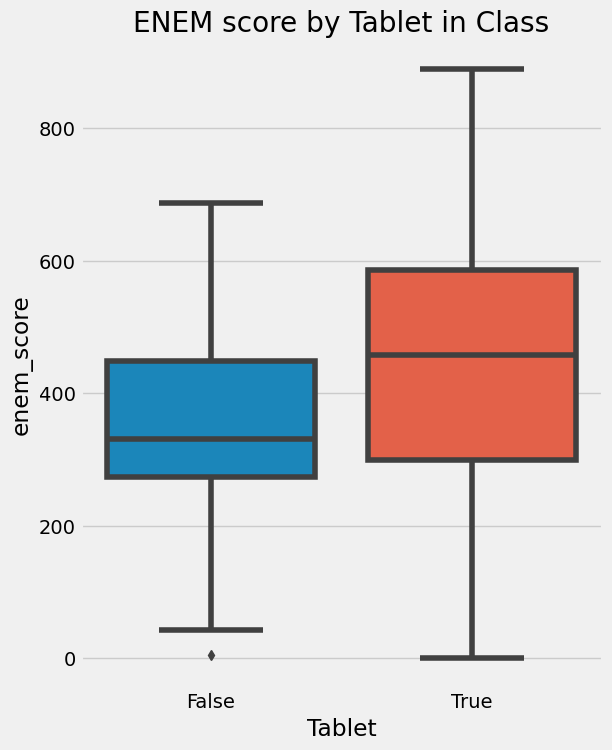

In [4]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

To better understand the data, we looked into two schools that gave tablets to students and two other schools that did not provide tablets. The following table shows ENEM scores for these four schools under the study.  

In other words, we only consider the actual outcomes (factuals or observations), not the potential outcomes (counterfactuals). Therefore, $Y_1$ is not available for schools without tables $T = 0$ and the same for $(Y_0 | T = 1)$.

In [5]:

pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,np.nan,np.nan],
    y1=[np.nan,np.nan,600,750],
    T= [0,0,1,1],
    y= [500,600,600,750],
    TE=[-500,-600,600,750],
))

,i,y0,y1,T,y,TE
0,1,500.0,NaN,0,500,-500
1,2,600.0,NaN,0,600,-600
2,3,NaN,600.0,1,600,600
3,4,NaN,750.0,1,750,750


<br/>

We calculate the **TE** in the last columns by putting zero instead 'Not a Number' (NaN) values for counterfactual values. Then, $ATE$ will be the mean of the last column. $125$ means that tablets have a positive impact on students' scores.

$ATE = (600+750)/2  - (500 + 600)/2  = 125$

**But calculating ATE using the table above is wrong!** Because we take the mean of the treated and subtract it from the mean of the untreated while we dont have values for $(Y_0 | T = 1)$ and $(Y_1 | T = 0)$. NaN is not mean $0$.

<br/>


We know we can't see both potential outcomes (tablet and no tablet at the same time), but for the sake of argument, let's suppose we can!

Pretend we have godlike power to see the potential alternative outcomes. With that power, say we collect data on the same four schools. We know students score on the same annual academic tests if they have an oppositive situation with tablets.(BTW, there is a possibility to estimate counterfactual values. For example, look at students' performance in the same schools in previous years.)

The following table shows the data. 

In [6]:
import pandas as pd
pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,800,700],
    y1=[450,600,600,750],
    T= [0,0,1,1],
    y= [500,600,600,750],
    TE=[-50,0,-200,50],
))

,i,y0,y1,T,y,TE
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


So, we calculate the $ATE$ considering **counterfactuals** or potential outcomes in addition to actual outcomes.
The $ATE$ here would be the mean of the last column, that is, of the treatment effect (TE).

$ATE=(-50 + 0 - 200 + 50)/4 = -50$

This would mean that tablets reduced the academic performance of students, on average, by 50 points. 

The $ATT$ here would be the mean of the last column when $T=1$:

$ATT=(- 200 + 50)/2 = -75$

This is saying that, for the schools that were treated, the tablets reduced the academic performance of students, on average, by 75 points. Of course we can never know this. 

**Why this does happen?**

## Bias is what makes Association different from Causation

> Back to our tablets in the classroom example. When we face the claim that schools that give tablets to their kids achieve higher test scores, we can dispute it by saying those schools will probably achieve higher test scores anyway, even without the tablets. Because they probably have more money than the other schools; hence they can pay better teachers, afford better classrooms, and so on. In other words, it is the case that **treated schools** (with tablets) are not comparable with **untreated schools**. 

To say this in potential outcome notation, we say that $Y_0$ of the treated is different from the $Y_0$ of the untreated. Remember that the $Y_0$ of the treated case is **counterfactual**. We can't observe it, but we can reason about it. 

> In our tablet example, we can probably say that $Y_0$ of the treated schools is more than $Y_0$ of the untreated schools. Schools that can afford tablets for their kids can also afford other factors that contribute to better test scores, such as location, teachers, facilities, etc.


With this example in mind, let's see why the Association is not Causation. 

* **<font color='blue'>Association<font>** is achieved by **comparing the mean actual outcomes from observation for the treated and the untreated** by $E[Y|T=1] - E[Y|T=0]$. 
* In our example, the Association is the average test score for the schools with tablets minus the average test score for those without them. 
* On the other hand, **<font color='blue'>Causation<font>** includes **potential outcomes, not just actual (observed) outcomes** $E[Y_1 - Y_0]$.
* In our example, the causation is the average test score for all schools' outcomes assuming they have (potentially) tablets minus all schools' outcomes assuming they do NOT have (potentially) tablets.

<br/><br/>
To see how Association and Causation relate, let's take the association measurement and replace the observed outcomes with the potential outcomes. For the treated case, the observed outcome is $Y_1$. For the untreated case, the observed outcome is $Y_0$.

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0]
$

Now, let's add and subtract a counterfactual outcome $E[Y_0|T=1]$ to right hand side. It tells what the treated schools' outcome would have been if they did not receive the treatment. 
> In our tablet exmaple, the term $E[Y_0|T=1]$ means what would happened to schools with tablets, if we would not give them tablets.

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] - E[Y_0|T=1]
$

<br/><br/>
Finally, we reorder the terms, merge some expectations, and we have:

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

* First term is **Average Treatment Effect on the Treated (ATT)**. It means the difference of students performance with tablet or actual outcome $Y_1$ and students performance without tablet or potential outcome $Y_0$ for schools that have tablets. It also called associations.

<br>
    
* Second term is **Bias**. It is the diffrence between students performance without tablet in schools that provide tablet (a potential outcome or counterfactual) mines the student performance without tablet is schools that do not provide tablet (an actual outcome or observation).

    * The **bias** is given by how the treated and untreated (control) groups differ before the treatment, in case non of them has received the treatment**. 

    
<br/><br/>
    
> Back to the tablets example, we can now say why we are suspicious when someone tells us that having tablets in the classroom boost academic performance. We think that, in this example, $E[Y_0|T=0] < E[Y_0|T=1]$, which means schools that can afford to give tablets to their kids have better performance than those that can't, **regardless of the tablets treatment**.


> the treated and untreated schools don't differ only on tablets. They also differ in tuition cost, location, teachers, etc. So before saying tablets in the classroom increase academic performance, we would need schools with and without them to be, on average, similar to each other.

<br/><br/>

<font color='blue'>**The causal inference is about finding clever ways to remove bias and make the treated and the untreated comparable. All the difference we see between them is only the average treatment effect. Eventually, causal inference is about figuring out how the world works, stripped of all bias and misinterpretations.**</font>

For example, the following scatter plot shows the relationship between tuition fees and the national ENEM score.

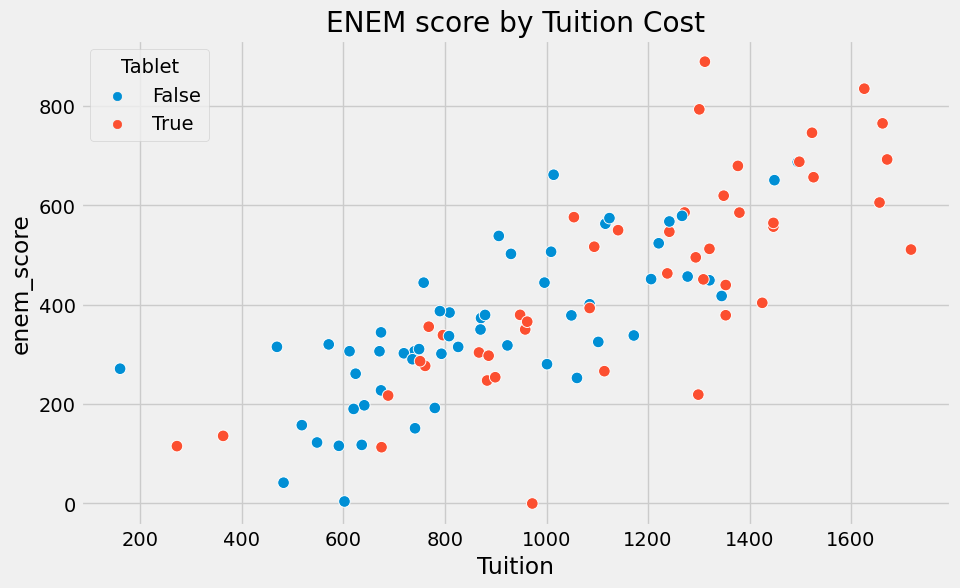

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Tuition", y="enem_score", hue="Tablet", data=data, s=70).set_title('ENEM score by Tuition Cost')
plt.show()

<br/>

## Randomized Experiments, When Association become Causation

In the previous session, we saw why and how association differs from causation. It also gives us an indication of what makes association causation.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

* **Association becomes causation if there is no bias.** There will be no bias if $E[Y_0|T=0] = E[Y_0|T=1]$. 

* In other words, association will be causation if the treated and untreated (control) groups are equal or comparable, except for the treatment they receive. 

* In more technical words, association will be causation when the outcome of the untreated is equal to the counterfactual outcome of the treated. Remember that counterfactual outcome is the outcome of the treated group if they had not received the treatment.

<br/><br/>
<font color='red'>**How to make association equal to causation in reality?**</font>

**Randomised Experiments** or **Randomised Controlled Trials (RCT)** is one of the tools we have to make the bias vanish.

* Randomised experiments randomly assign individuals in a population to a treatment or a control group.

* Randomisation annihilates bias by making the potential outcomes independent of the treatment.

$$
(Y_0, Y_1) \perp\!\!\!\perp T
$$

* $(Y_0, Y_1) \perp\!\!\!\perp T$ means that the treatment is the only thing generating a difference between the outcome in the treated and untreated (control) groups.

* Notice, here we are talking about **potential** outcomes instead of outcomes. The potential outcome is how the outcome **would have been** under treatment ($Y_1$) or under control ($Y_0$). 

* In simpler terms, knowing the treatment assignment doesn't give me any information on how the outcome was previous to the treatment. 


You can learn more on the random expriments and bias see this [lecture](https://scholar.harvard.edu/files/kasy/files/1-introduction_to_treament_effects.pdf) from [Prof. Maximilian Kasy](https://maxkasy.github.io/home/).


# Statistical Paradoxes in Causal Inference

Observation bias can easily produce statistical paradoxes in any data science application. Here we show two common paradoxes encountered in data science.

<br/>

## Simpson's Paradox

* **Simpson’s paradox** is often presented as a compelling demonstration of why we need statistics education in our schools. 

* It is a reminder of how easy it is to fall into a web of paradoxical conclusions when relying solely on intuition without rigorous statistical methods. 

* It can demonstrate the limits of statistical methods and why causal rather than statistical considerations are necessary to avoid those paradoxical conclusions [Judea Pearl, 2014](https://ftp.cs.ucla.edu/pub/stat_ser/r414.pdf).

* Simpson' Paradox occurs when an observed relationship between two variables is reversed when we consider another variable.


**Firefighters Example:** 
We collect data from previous fire accidents to see the relationship between the number of firefighters deployed to extinguish a fire and the number of people injured in the fire. 

* We would expect that having more firefighters would improve the outcome, yet a positive correlation is observed in the data: **the more firefighters are deployed, the higher the number of injured!**

<img src="img/ch3/Simpson_firefighter_Injures.png" alt="drawing" width="500"/>


<br/><br/>
To understand Simpson's paradox, let us consider the following graphical model. The key is to consider a third random variable: "fire severity." This third latent variable positively correlates with the other two. More severe fires tend to cause more injuries, and at the same time, they require more firefighters to be extinguished.

<img src="img/ch3/Fork_paradox_fire.png" alt="drawing" width="800"/>

We create a new scatter plot with some tweaks. We consider observations corresponding to three levels of fire severity (i.e., we condition our observations on the latent variable). **We can see the negative correlation we would have expected.**

<img src="img/ch3/Simpson_firefighter_Injures_severity.png" alt="drawing" width="500"/>

- For a fire of severity, we observe that the more firefighters deployed, the fewer injured people.
- If we look at fires with higher severity, we observe the same trend even though the number of firefighters deployed and the number of injured people are higher.


<br/><br/>
## Berkson's Paradox

* Berkson's paradox (also known as Berkson's fallacy, Berkson's bias, or Collider bias) says events that seem to be correlated may are not correlated.

* Berkson wrote about the paradox in 1946. His original paper showed that two diseases without an actual relationship could be 'spuriously associated. ' However, the community didn't widely accept the idea until 1979.


**COVID-19 and Bone Fracture Example:**

A study showed a weird **observed negative association** between COVID-19 severity and bone fracture severity.

<img src="img/ch3/Berkson_Covid_fracture_hospital.png" alt="drawing" width="500"/>

The work of [Griffith 2020](https://doi.org/10.1038/s41467-020-19478-2) published in Nature suggests that this can be a case of **Berkson's Paradox**.

To understand the Berkson paradox, let us consider the following graphical model, where we include a third random variable: "being hospitalized."

<img src="img/ch3/Berkson_paradox_Covid.png" alt="drawing" width="800"/>

* This third variable, "being hospitalized," is a **collider** of the first two. 

* This means that both having a severe fracture and having severe COVID-19 increase the chances of being kept in a hospital. 

* Berkson's Paradox precisely arises when we condition on a collider, i.e., when we only observe data from hospitalized people rather than considering the whole population.


The study that shows the strange correlation between COVID-19 severity and bone fracture severity has a significant problem. They only considered hospitalized people (i.e., we condition on the collider variable). Repeating the same study on a bigger population, including hospitalized and non-hospitalized, showed no significant correlation! We know that fractures and respiratory diseases should be independent. 

<img src="img/ch3/Berkson_Covid_fracture.png" alt="drawing" width="500"/>


## Simpson's Paradox vs. Berkson's Paradox

- Simpson's paradox is a fork bias. 

- Berkson's paradox is a collider bias. 

- Simpson's paradox occurs when conditioning on a variable reveals the true association and failing to condition on a variable reveals a false association. 

- Berkson's paradox occurs when (inadvertently) conditioning on a variable reveals a false association, and the true association would have been revealed had no conditioning occurred.

## Catalog of Bias

To better understand the impact of biases, a group in Oxford University and other institutes are compiling a Catalogue of Bias, stemming from original work by David Sackett. The entries are a work in progress and describe a wide range of biases –  outlining their potential impact in research studies.

Check thier webpage [here](https://catalogofbias.org).


## Homework

**What are other types of Bias that may affect causal inference?** 

Each group does research. Try to find biases that are not included in Oxford's Catalog of Bias (if you can). One member of each group will present the group's findings for 5 min in the next session.  

## References

This chapter contents are highly inspired by the open-source book on causality by Matheus Facure Alves.

* [Causal Inference for The Brave and True](https://matheusfacure.github.io/python-causality-handbook/landing-page.html)

We also acknowledge the Causal Inference Book by Miguel Hernan and Jamie Robins.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)